# Sales Analysis

### Import necessary libraries

In [1]:
import os
import pandas as pd

#### Merge data from each month into one CSV

In [2]:
# Not  Using this for the secong time as we alreday created the .csv files from the first time
# Also getting some different line added when we ran second or third time 

# path = "./Sales_Data"
# files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

# all_months_data = pd.DataFrame()

# for file in files:
#     current_data = pd.read_csv(path+"/"+file)
#     all_months_data = pd.concat([all_months_data, current_data])
    
# all_months_data.to_csv("all_data_copy.csv", index=False)
    

### Read in updated dataframe

In [3]:
all_data = pd.read_csv("all_months_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [36]:
all_data.shape

(185950, 8)

## Clean Up the Data !

#### Drop Rows of NaN

In [4]:
#Checking all the NaN values in the dataset
all_data[all_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185175,NaN,NaN,NaN,NaN,NaN,NaN
185437,NaN,NaN,NaN,NaN,NaN,NaN
186041,NaN,NaN,NaN,NaN,NaN,NaN
186547,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dropping all the NaN values from the Dataset using  .dropna() 
all_data = all_data.dropna()
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
#Checking if there is any NaN values in the Dataset
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
#Removing all the rows that does not have any date on the order date column
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Convert all the columns to the correct types :

In [13]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

### Task 2: Add month column

In [15]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 3 : Add a Sales Column

In [17]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each'] 

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [30]:
sales_data = all_data.groupby('Month').sum()['Sales']

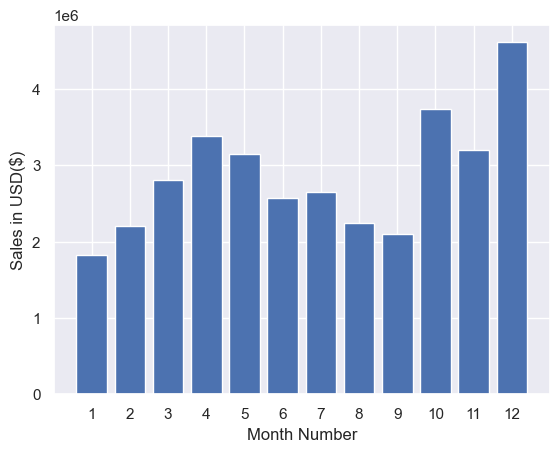

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

months = range(1,13)
plt.bar(months, sales_data)
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month Number')
plt.show()

### Question 2: What US city had the highest number of sales ?

In [34]:
all_data['Purchase Address']

0                    917 1st St, Dallas, TX 75001
1               682 Chestnut St, Boston, MA 02215
2            669 Spruce St, Los Angeles, CA 90001
3            669 Spruce St, Los Angeles, CA 90001
4               333 8th St, Los Angeles, CA 90001
                           ...                   
186844     840 Highland St, Los Angeles, CA 90001
186845    216 Dogwood St, San Francisco, CA 94016
186846       220 12th St, San Francisco, CA 94016
186847     511 Forest St, San Francisco, CA 94016
186848     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185950, dtype: object